# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [13]:
import pandas as pd

data = pd.read_csv("/content/Nutrition__Physical_Activity__and_Obesity_-_Women__Infant__and_Child.csv")

data.shape

(12852, 31)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [14]:
# Get count of unique values for each column
unique_counts = data.nunique()
sorted_unique_counts = unique_counts.sort_values(ascending=False)
print(sorted_unique_counts)
most_diverse_column = sorted_unique_counts.index[0]
print(f"\nColumn with most unique values: {most_diverse_column}")
print(f"Number of unique values: {sorted_unique_counts[0]}")

Sample_Size                   6704
High_Confidence_Limit          299
Low_Confidence_Limit           261
Data_Value                     259
Data_Value_Alt                 259
LocationAbbr                    54
LocationDesc                    54
LocationID                      54
GeoLocation                     54
Stratification1                 15
StratificationID1               15
YearStart                        7
YearEnd                          7
Age(months)                      7
Race/Ethnicity                   5
StratificationCategoryId1        4
StratificationCategory1          4
QuestionID                       3
Question                         3
Gender                           2
Datasource                       1
Class                            1
DataValueTypeID                  1
Data_Value_Type                  1
TopicID                          1
ClassID                          1
Data_Value_Footnote_Symbol       1
Total                            1
Data_Value_Footnote 

<ipython-input-14-91884799ef65>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of unique values: {sorted_unique_counts[0]}")


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [15]:
# Find columns where all values are the same
redundant_columns = []
for column in data.columns:
    if data[column].nunique() == 1:
        unique_value = data[column].iloc[0]
        redundant_columns.append((column, unique_value))

# Display results
if redundant_columns:
    print("Columns with same value in every row:")
    for column, value in redundant_columns:
        print(f"Column '{column}' has value '{value}' in all rows")
else:
    print("No columns found where all rows have the same value")

# Alternative method using boolean indexing
redundant_mask = data.nunique() == 1
redundant_cols = data.columns[redundant_mask]
if not redundant_cols.empty:
    print("\nAlternative display:")
    print(data[redundant_cols].iloc[0])

Columns with same value in every row:
Column 'Datasource' has value 'Women, Infants, and Children Participant and Program Characteristics' in all rows
Column 'Class' has value 'Obesity / Weight Status' in all rows
Column 'Topic' has value 'Obesity / Weight Status' in all rows
Column 'Data_Value_Type' has value 'Value' in all rows
Column 'Data_Value_Footnote_Symbol' has value 'nan' in all rows
Column 'Data_Value_Footnote' has value 'nan' in all rows
Column 'Total' has value 'nan' in all rows
Column 'ClassID' has value 'OWS' in all rows
Column 'TopicID' has value 'OWS1' in all rows
Column 'DataValueTypeID' has value 'VALUE' in all rows

Alternative display:
Datasource                    Women, Infants, and Children Participant and P...
Class                                                   Obesity / Weight Status
Topic                                                   Obesity / Weight Status
Data_Value_Type                                                           Value
Data_Value_Footn

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

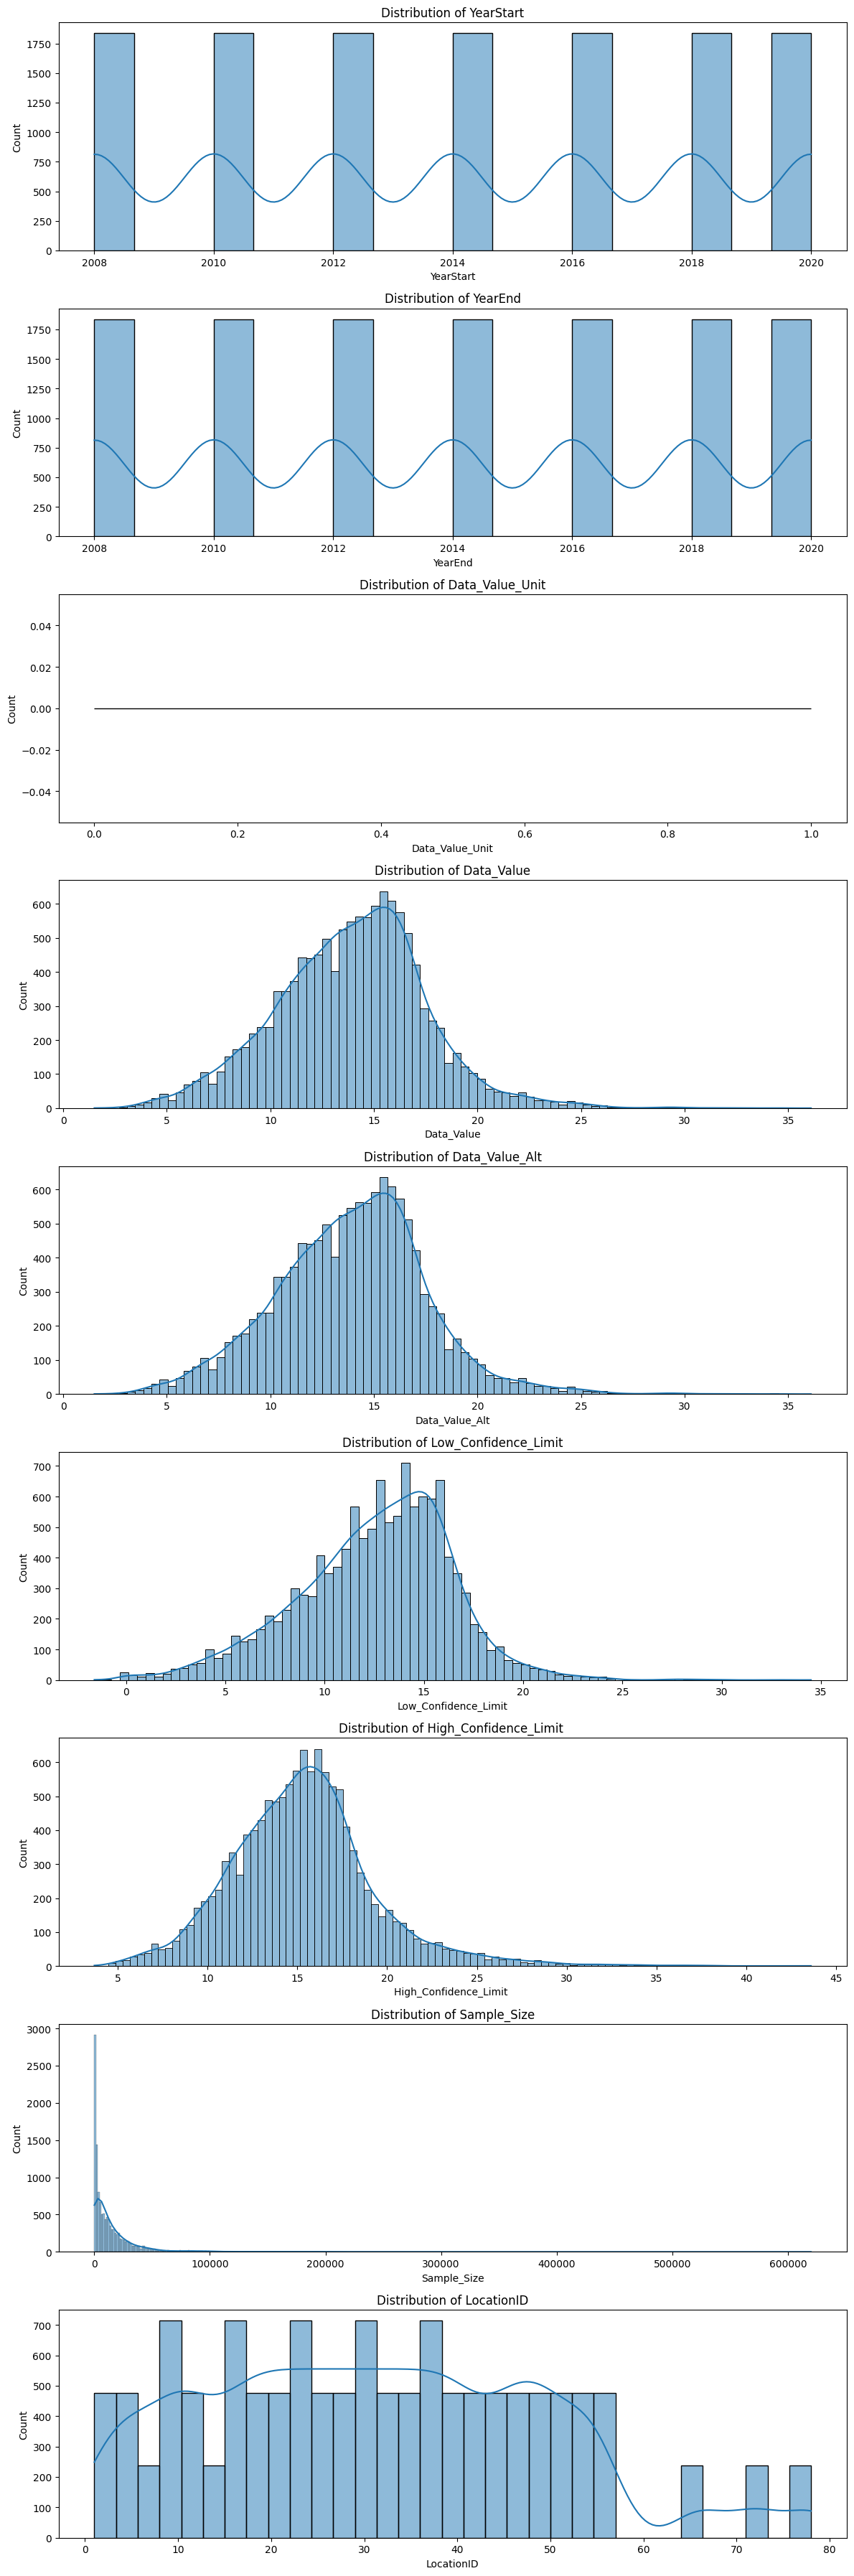

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 4 * len(numeric_columns)))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [18]:
def analyze_numeric_outliers(df):
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        print(f"\nOutlier Analysis for {col}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers)/len(df)*100):.2f}%")
        print(f"Range of outliers: {outliers.min():.2f} to {outliers.max():.2f}")

analyze_numeric_outliers(data)


Outlier Analysis for YearStart:
Number of outliers: 0
Percentage of outliers: 0.00%
Range of outliers: nan to nan

Outlier Analysis for YearEnd:
Number of outliers: 0
Percentage of outliers: 0.00%
Range of outliers: nan to nan

Outlier Analysis for Data_Value_Unit:
Number of outliers: 0
Percentage of outliers: 0.00%
Range of outliers: nan to nan

Outlier Analysis for Data_Value:
Number of outliers: 219
Percentage of outliers: 1.70%
Range of outliers: 1.50 to 36.10

Outlier Analysis for Data_Value_Alt:
Number of outliers: 219
Percentage of outliers: 1.70%
Range of outliers: 1.50 to 36.10

Outlier Analysis for Low_Confidence_Limit:
Number of outliers: 200
Percentage of outliers: 1.56%
Range of outliers: -1.60 to 34.50

Outlier Analysis for High_Confidence_Limit :
Number of outliers: 418
Percentage of outliers: 3.25%
Range of outliers: 3.70 to 43.60

Outlier Analysis for Sample_Size:
Number of outliers: 954
Percentage of outliers: 7.42%
Range of outliers: 44350.00 to 620016.00

Outlier A



---



## Submitting Your Work

Submit your work as usual.